# Load libraries and data

In [8]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from process import get_binary_data

X, Y = get_binary_data()

## Split into train and test sets

In [9]:
#holding out 100 random samples as test set
X, Y = shuffle(X, Y)
Xtrain = X[:-100]
Ytrain = Y[:-100]
Xtest = X[-100:]
Ytest = Y[-100:]

# Train Logistic Regression

## Initialize weights

In [10]:
D = X.shape[1]
W = np.random.randn(D)
b = 0

## Define Functions for training

In [11]:
def sigmoid(a):
   return 1 / (1 + np.exp(-a))

def forward(X, W, b):
    return sigmoid(X.dot(W) + b)

def classification_rate(Y, P):
    return np.mean(Y == P)

def cross_entropy(T, pY):
    return -np.mean(T*np.log(pY) + (1-T)*np.log(1-pY))

## Train the model using gradient descent

In [12]:
train_costs = []
test_costs = []
learning_rate = 0.001

for i in range(10000):
    #log reg outputs
    pYtrain = forward(Xtrain, W, b)
    pYtest = forward(Xtest, W, b)

    #keep track of cross entropy
    ctrain = cross_entropy(Ytrain, pYtrain)
    ctest = cross_entropy(Ytest, pYtest)

    #append to lists
    train_costs.append(ctrain)
    test_costs.append(ctest)

    #vectorized gradient descent
    W -= learning_rate*Xtrain.T.dot(pYtrain - Ytrain)
    b -= learning_rate*(pYtrain - Ytrain).sum()
    #print entropies every 1,000 iterations
    if i % 1000 == 0:
        print(i, ctrain, ctest)
    
print('Final train classification_rate:', classification_rate(Ytrain, np.round(pYtrain)))
print('Final test classification_rate:', classification_rate(Ytest, np.round(pYtest)))

0 0.720895561519428 0.6984674620302143
1000 0.17078003817843618 0.22436070848444598
2000 0.1694855848216186 0.2235890981305298
3000 0.16937178034340886 0.2236587873040862
4000 0.16935935323508505 0.22371199512685624
5000 0.1693579080565953 0.22373351033873196
6000 0.169357736495659 0.22374131607811754
7000 0.16935771598622407 0.22374406150669254
8000 0.16935771352849288 0.22374501745080227
9000 0.169357713233728 0.2237453491732744
Final train classification_rate: 0.9798657718120806
Final test classification_rate: 0.96


## Visualize Costs

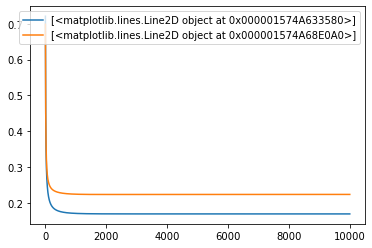

In [15]:
legend1 = plt.plot(train_costs, label = 'train cost')
legend2 = plt.plot(test_costs, label = 'test cost')
plt.legend([legend1, legend2])
plt.show()